# ESL Exercises from Ch. 2

In [28]:
import numpy as np
import pandas as pd
import scipy as sc
import math
import matplotlib.pyplot as plt
import itertools
import os
import sys
import gzip

sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))))

from playground import utils

### Exercise 2.3

In [34]:
def combination(n, r):
    """
    n choose r
    """
    
    if n < r:
        combo = 0.
    else:
        combo = math.factorial(n) / (math.factorial(r) * math.factorial(n-r)) 
    return combo

want to see behavior of $\sum_{i=0}^{m}(-1)^{i} \binom{n}{i} = (-1)^m \binom{n-1}{m}$

In [35]:
rs = np.linspace(0, 1, 1000)

In [39]:
def compute_first_order_stat_pdf(r, n, p):
    output = n * p * (1 - r**p)**(n-1) * r**(p-1)
    return output

In [62]:
ns = [10, 100, 1000]
ps = [3, 50, 1000]

In [63]:
pdfs = []

for n, p in [(n, p) for n in ns for p in ps]:
    temp_pdf = pd.Series(compute_first_order_stat_pdf(rs, n, p), index=rs)
    temp_pdf.name = "n={}; p={}".format(n, p)
    pdfs.append(temp_pdf)
    
pdfs = pd.concat(pdfs, axis=1)

In [64]:
pdfs_normalize = pdfs / pdfs.max()

<AxesSubplot:>

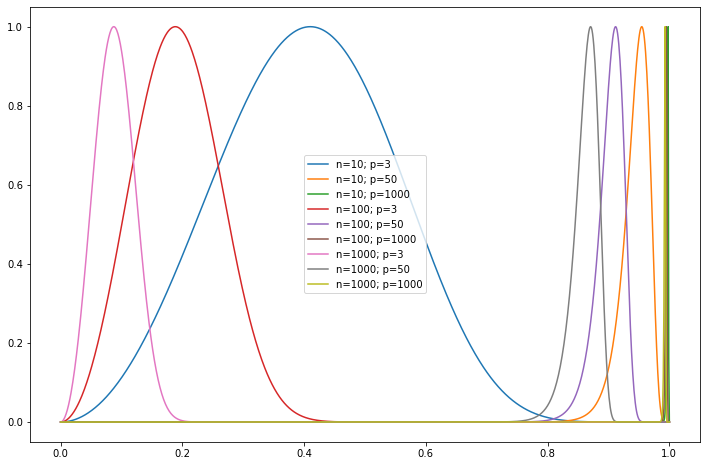

In [65]:
pdfs_normalize.plot(figsize=(12,8))

In [67]:
pdfs_discrete = pdfs / pdfs.sum()

In [71]:
pdfs_discrete.apply(lambda x: (x.index * x).sum())

n=10; p=3         0.405619
n=10; p=50        0.943393
n=10; p=1000      0.997069
n=100; p=3        0.191961
n=100; p=50       0.901745
n=100; p=1000     0.994825
n=1000; p=3       0.089278
n=1000; p=50      0.861239
n=1000; p=1000    0.992544
dtype: float64

In [75]:
def d(n, p):
    return (1 - 0.5**(1/n))**(1/p)

pd.Series({"n={}; p={}".format(n, p): d(n,p) for n in ns for p in ps})

n=10; p=3         0.406088
n=10; p=50        0.947365
n=10; p=1000      0.997300
n=100; p=3        0.190447
n=100; p=50       0.905287
n=100; p=1000     0.995037
n=1000; p=3       0.088489
n=1000; p=50      0.864597
n=1000; p=1000    0.992752
dtype: float64

In [77]:
def test_sum(r, n, p):
    output = sum([combination(n-1, i) * (-1)**i * r**(p*i+p) for i in range(n)])
    
    return output

def test_raw(r, n, p):
    return r**p * (1 - r**p)**(n-1)

In [84]:
r = 0.1
n = 5
p = 3

print(test_sum(r, n, p))
print(test_raw(r, n, p))

0.0009960059960010003
0.0009960059960010003


In [96]:
def expected_value(rs, n, p):

    pdf = compute_first_order_stat_pdf(rs, n, p)

    pdf /= sum(pdf)

    return np.sum(pdf*rs)
    
    

In [99]:
expected_value(rs, 10, 1000)

0.9970690959521377

In [100]:
np.linspace

<function numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)>

In [104]:
np.arange(0,1, 0.001)

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,

In [152]:
p = 1
n = 5

def compute_integral_numeric(func, lower, upper, step=0.00001):
    x_vals = np.array(np.arange(lower, upper, step=step).tolist() + [upper])
    func_vals = func(x_vals)
    dx = np.array([1.0 for i in range(len(x_vals))])
    dx /= sum(dx)
    integral = sum(func_vals * dx)    
    
    return integral


def function_raw(r):
    return r**p * (1 - r**p)**(n-1)

def function_series(r):
    output = 0.
    
    for i in range(n):
        output += (combination(n-1, i) * (-1)**i * r**(p*i+p))
        
    return output

In [153]:
compute_integral_numeric(function_raw, 0, 1)

0.03333299999500031

In [154]:
compute_integral_numeric(function_series, 0, 1)

0.03333299999500032

# 2.8 Zip Code Data

In [42]:
zipcode_data_path = os.path.join(utils.get_playground_path(), "playground\\learning\\esl\\data\\zip_code")

test_file_name = os.path.join(zipcode_data_path, "zip.test.gz")
train_file_name = os.path.join(zipcode_data_path, "zip.train.gz")